# Discussion : comparison with other GCMs and Scenarios


In [1]:
# updated script version for flattening gfdl-esm2m overshoot stabilisation scenarios from university of Bern 
from oggm import utils
import sys
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
# get the dataset where coordinates of glaciers are stored
frgi = utils.file_downloader('https://cluster.klima.uni-bremen.de/~oggm/rgi/rgi62_stats.h5')
#frgi = '/home/users/lschuster/glacierMIP/rgi62_stats.h5'
odf = pd.read_hdf(frgi, index_col=0)
odf['coords'] = [(lon,lat) for lon,lat in zip(odf['CenLon'],odf['CenLat'])]

In [3]:
gcms_cmip6_2300 = pd.read_csv('/home/www/oggm/oggm_output/analysis_notebooks/all_gcm_list_2300_vJul2023.csv', index_col=0)  
gcms_cmip6 = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list.csv', index_col=0)   

gcms_ssps = []
for ind in gcms_cmip6.loc[gcms_cmip6['var']=='pr'].index:
    gcms_ssps.append(f'{gcms_cmip6.loc[ind].gcm}_{gcms_cmip6.loc[ind].ssp}')

In [41]:
cmip='CMIP6'
endyr='2300'
hist = 'w5e5_gcm_merged'
bc  = '_bc_2000_2019' #'_bc_2000_2019'
pa = '/home/www/oggm/oggm_output/analysis_notebooks'
df_scenario_cmip6_2300 = xr.open_dataset(f'{pa}/volume_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr{endyr}.nc')
df_scenario_cmip6_2300 = df_scenario_cmip6_2300.sel(hist=hist)


In [64]:
df_scenario.bias_correction

<xarray.DataArray 'bias_correction' (bias_correction: 2)>
array(['bc_1980_2019', 'bc_2000_2019'], dtype=object)
Coordinates:
  * bias_correction  (bias_correction) object 'bc_1980_2019' 'bc_2000_2019'
    OGGM_version     <U22 'OGGM_v161_gdirs_2023.3'

In [210]:
pd_clim_all = pd.read_csv('../annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', index_col = 'Unnamed: 0')
df_scenario = xr.open_dataset(f'common_running_sum_all_provide_reg_oversh_stab_2000_2500.nc')
df_scenario = df_scenario.sel(bias_correction='bc_2000_2019')
pd_clim_all_global = pd_clim_all.loc[pd_clim_all.region =='global']
pd_clim_all_global.index = pd_clim_all_global.year

pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019 = pd.DataFrame(columns =['cum_temp_ch_2000_2019'] )
df_scenario_glob = df_scenario.sum(dim='provide_region')
final_glob_vol_rel = 100*df_scenario_glob.sel(time=2300).volume/df_scenario_glob.sel(time=2020).volume

init_runoff = df_scenario_glob.sel(time=slice(2000,2050)).runoff.mean(dim='time')
final_glob_runoff_50yr_rel = 100*df_scenario_glob.sel(time=slice(2250,2300)).runoff.mean(dim='time')/init_runoff

for scenario in pd_clim_all_global.scenario.unique()[1:]: # for bc_2000_2019 not yet the stabT12 run ...
    pd_clim_all_global_s = pd_clim_all_global.loc[pd_clim_all_global.scenario ==scenario]
    temp_ref_global, precip_ref_global = pd_clim_all_global_s.loc[2000:2019][['temp','precip']].mean()
    _temp_ch_cum_sum = (pd_clim_all_global_s.loc[2000:2300, 'temp']-temp_ref_global).sum()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'vol_2300_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                         'runoff_2300_50_yr_avg_%'] = final_glob_runoff_50yr_rel.sel(scenario=scenario).squeeze()
    
    if 'oversh' in scenario:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                             'overshoot'] = 'yes'
    else:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019.loc[scenario,
                                             'overshoot'] = 'no'

In [211]:
pd_clim_all = pd.read_csv('../annual_glob_rgi_reg_basin_temp_precip_timeseries_oversh_stab.csv', index_col = 'Unnamed: 0')
df_scenario = xr.open_dataset(f'common_running_sum_all_provide_reg_oversh_stab_2000_2500_bc_1980_2019.nc')

pd_clim_all_global = pd_clim_all.loc[pd_clim_all.region =='global']
pd_clim_all_global.index = pd_clim_all_global.year

pd_cum_glob_temp_ch_vs_volume_ch_gfdl = pd.DataFrame(columns =['cum_temp_ch_2000_2019'] )
df_scenario_glob = df_scenario.sum(dim='provide_region')
final_glob_vol_rel = 100*df_scenario_glob.sel(time=2300).volume/df_scenario_glob.sel(time=2020).volume
init_runoff = df_scenario_glob.sel(time=slice(2000,2050)).runoff.mean(dim='time')
final_glob_runoff_50yr_rel = 100*df_scenario_glob.sel(time=slice(2250,2300)).runoff.mean(dim='time')/init_runoff

for scenario in pd_clim_all_global.scenario.unique():
    pd_clim_all_global_s = pd_clim_all_global.loc[pd_clim_all_global.scenario ==scenario]
    temp_ref_global, precip_ref_global = pd_clim_all_global_s.loc[2000:2019][['temp','precip']].mean()
    _temp_ch_cum_sum = (pd_clim_all_global_s.loc[2000:2300, 'temp']-temp_ref_global).sum()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'vol_2300_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()
    pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                         'runoff_2300_50_yr_avg_%'] = final_glob_runoff_50yr_rel.sel(scenario=scenario).squeeze()
    #pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
    #                                         'vol_2500_%'] = final_glob_vol_rel.sel(scenario=scenario).squeeze()

    if 'oversh' in scenario:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                             'overshoot'] = 'yes'
    else:
        pd_cum_glob_temp_ch_vs_volume_ch_gfdl.loc[scenario,
                                             'overshoot'] = 'no'

In [212]:
pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019['option'] = 'gfdl-esm2m_bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019['bc'] = 'bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl['option'] = 'gfdl-esm2m_bc_1980_2019'
pd_cum_glob_temp_ch_vs_volume_ch_gfdl['bc'] = 'bc_1980_2019'

In [213]:
pd_cum_glob_temp_ch_vs_volume_ch_all = pd.concat([pd_cum_glob_temp_ch_vs_volume_ch_gfdl,
                                                  pd_cum_glob_temp_ch_vs_volume_ch_gfdl_bc_2000_2019])
pd_cum_glob_temp_ch_vs_volume_ch_all['gcm'] = 'gfdl-esm2m'

<AxesSubplot:xlabel='cum_temp_ch_2000_2019', ylabel='vol_2300_%'>

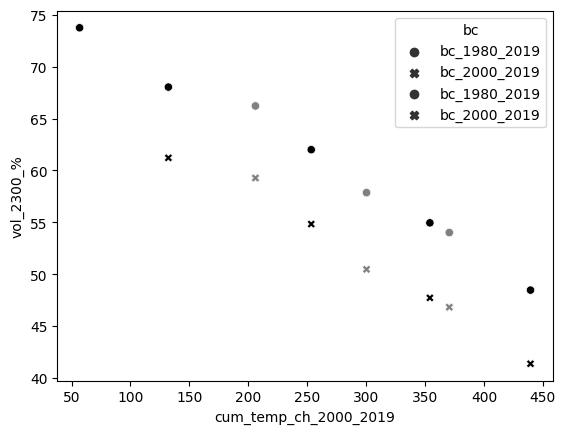

In [214]:

sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='cum_temp_ch_2000_2019', color='black', style='bc')

sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all.loc[pd_cum_glob_temp_ch_vs_volume_ch_all.overshoot=='yes'],
               y='vol_2300_%', x='cum_temp_ch_2000_2019', color='grey', style='bc')

Text(0.5, 0, 'Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

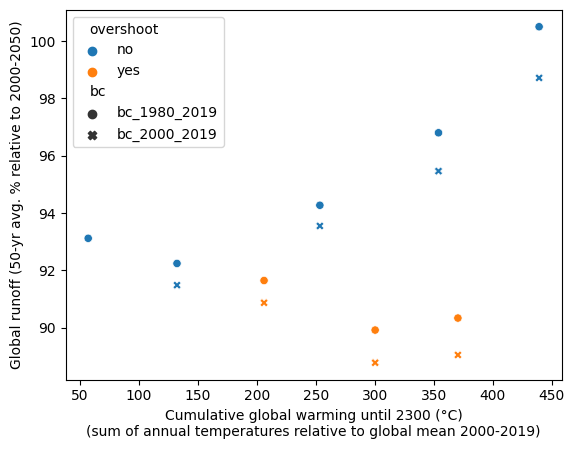

In [215]:
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='cum_temp_ch_2000_2019',
                hue='overshoot', style='bc')
plt.ylabel('Global runoff (50-yr avg. % relative to 2000-2050)')
plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

In [209]:
pd_cum_glob_temp_ch_vs_volume_ch = pd.DataFrame(columns =['cum_temp_ch_2000_2019'])
df_scenario_cmip6_2300_runoff = xr.open_dataset(f'{pa}/runoff_evol_per_rgi_reg_common_running_glaciers_oggm_all_exp_v16_2023.3{bc}_{cmip}_endyr{endyr}.nc')
df_scenario_cmip6_2300_runoff = df_scenario_cmip6_2300_runoff.sel(hist='w5e5_gcm_merged')
for ssp in ['ssp126','ssp534-over']: # ,'ssp585']: (those are just too extreme, we don't want them...)
    gcms_cmip6_2300_over = gcms_cmip6_2300.loc[(gcms_cmip6_2300.ssp ==ssp) & (gcms_cmip6_2300['var'] =='tas')]
    for f in gcms_cmip6_2300_over.index:
        gcm = gcms_cmip6_2300_over.loc[f]['gcm']
        dtas_annual = xr.open_dataset(gcms_cmip6_2300_over.loc[f]['path'],
                                      use_cftime=True).sel(time=slice('2000','2300')).tas.groupby('time.year').mean()

        weight = np.cos(np.deg2rad(dtas_annual.lat))
        weight = weight / weight.sum()

        # get the global means for every month:        
        global_dtas = (dtas_annual.mean(dim='lon') * weight).sum(dim='lat')
        _temp_ch_cum_sum = (global_dtas - global_dtas.sel(year=slice(2000,2019)).mean().values).sum().values
        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{ssp}',
                                         'cum_temp_ch_2000_2019'] = _temp_ch_cum_sum
        
        df_scenario_cmip6_2300_s = df_scenario_cmip6_2300.sel(gcm_scenario=f'{gcm}_{ssp}').sum(dim='rgi_reg').volume
        df_scenario_cmip6_2300_s_runoff = df_scenario_cmip6_2300_runoff.sel(gcm_scenario=f'{gcm}_{ssp}').sum(dim='rgi_reg').runoff

        df_scenario_cmip6_2300_vol_s_rel = 100*df_scenario_cmip6_2300_s.isel(time=-1)/df_scenario_cmip6_2300_s.sel(time=2020)
        init_runoff = df_scenario_cmip6_2300_s_runoff.sel(time=slice(2000,2050)).mean(dim='time')
        df_scenario_cmip6_2300_s_runoff = 100*df_scenario_cmip6_2300_s_runoff.sel(time=slice(2250,2300)).mean(dim='time')/init_runoff
        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{ssp}',
                                             'vol_2300_%'] = df_scenario_cmip6_2300_vol_s_rel.values
        pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{ssp}',
                                             'runoff_2300_50_yr_avg_%'] = df_scenario_cmip6_2300_s_runoff.values
        if ssp =='ssp534-over':
            pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{ssp}',
                                                 'overshoot'] = 'yes'
        else:
            pd_cum_glob_temp_ch_vs_volume_ch.loc[f'{gcm}_{ssp}',
                                                 'overshoot'] = 'small (ssp126)'

In [216]:
#pd_cum_glob_temp_ch_vs_volume_ch = pd_cum_glob_temp_ch_vs_volume_ch.astype('float')
pd_cum_glob_temp_ch_vs_volume_ch['bc'] = 'bc_2000_2019'
pd_cum_glob_temp_ch_vs_volume_ch['gcm'] = 'from_cmip6'

In [217]:
pd_cum_glob_temp_ch_vs_volume_ch_all = pd.concat([pd_cum_glob_temp_ch_vs_volume_ch_all,
                                                  pd_cum_glob_temp_ch_vs_volume_ch])

In [218]:
pd_cum_glob_temp_ch_vs_volume_ch_all[['cum_temp_ch_2000_2019', 'vol_2300_%']] = pd_cum_glob_temp_ch_vs_volume_ch_all[['cum_temp_ch_2000_2019', 'vol_2300_%']].astype(float)

Text(0.5, 0, 'Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

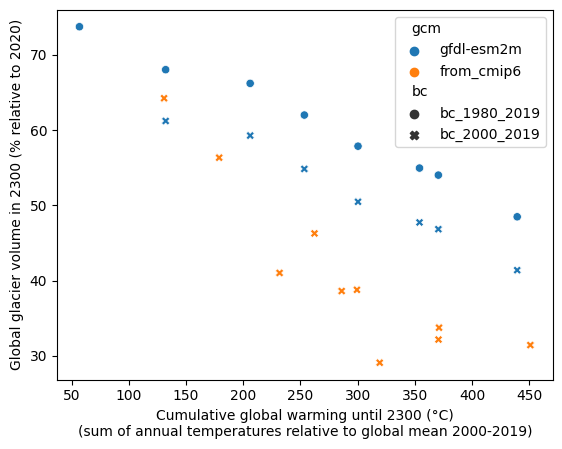

In [219]:
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='vol_2300_%', x='cum_temp_ch_2000_2019', hue='gcm', style='bc',
               )# size='overshoot')
plt.ylabel('Global glacier volume in 2300 (% relative to 2020)')
plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

- attention: the gfdl-esm2m bc_2000_2019 stab_T12 has not been run yet (i.e., a missing blue cross at around x=50)

Text(0.5, 0, 'Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')

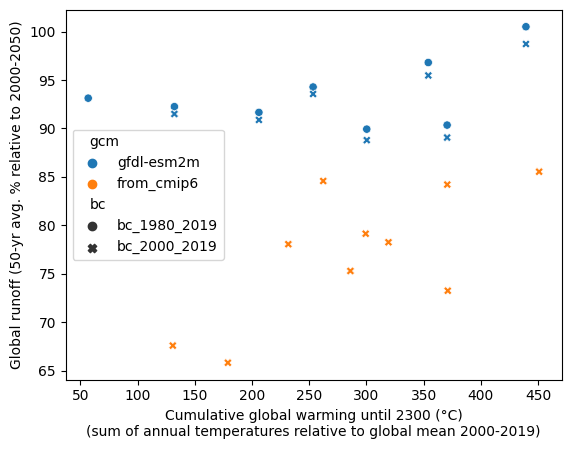

In [222]:
sns.scatterplot(data=pd_cum_glob_temp_ch_vs_volume_ch_all,
               y='runoff_2300_50_yr_avg_%', x='cum_temp_ch_2000_2019',
                hue='gcm', style='bc') #, size='overshoot')
plt.ylabel('Global runoff (50-yr avg. % relative to 2000-2050)')
plt.xlabel('Cumulative global warming until 2300 (°C)\n(sum of annual temperatures relative to global mean 2000-2019)')